# Exercise 1: Linear Regression
> In this exercise, I will implement the Linear Regression with one variable and work with example data.
> * Input: Square feet (X)
> * Output: House price in $1000s (Y)
> * Number of training examples: 10

## Table of contents
* [1. Plotting the data](#C1)
* [2. Gradient Descent](#C2)
    * [2.1. Equations](#C2_1)
    * [2.2. Implementation](#C2_2)
    * [2.3. Cost function $J(\theta)$](#C2_3)
    * [2.4. Gradient Descent](#C2_4)
* [3. Visualizing $J(\theta)$](#C3)

## 1. Plotting the data <a id='C1'></a>
This chapter show the graph of example data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('example_data.txt', sep=',', header=None)
df.columns = ['House_Price', 'Square_Feet']
pd.DataFrame(df)


,House_Price,Square_Feet
0,245,1400
1,312,1600
2,279,1700
3,308,1875
4,199,1100
5,219,1550
6,405,2350
7,324,2450
8,319,1425
9,255,1700


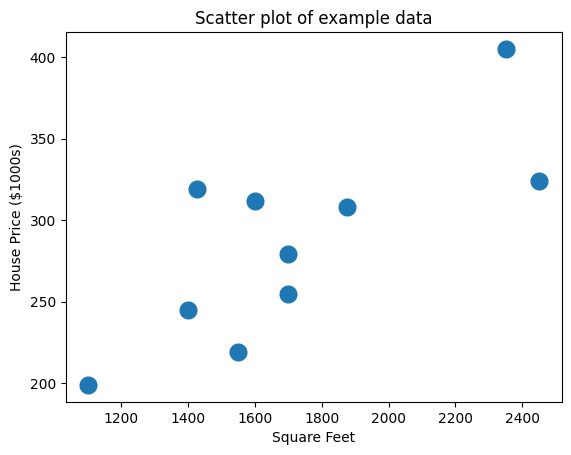

In [3]:
ax = sns.scatterplot(x='Square_Feet', y='House_Price', data=df, s = 200)
ax.set(xlabel='Square Feet', ylabel='House Price ($1000s)', title='Scatter plot of example data');

## 2. Gradient Descent <a id='C2'></a>
This chapter fit the linear regression parameters $\theta$ to the dataset using gradient descent

### 2.1. Equations <a id='C2_1'></a>
The hypothesis of linear regression is:
$$h_{\theta}(x)=\theta_{0} + \theta_{1} x_{1}$$
The objective of linear regression is to minimize the cost function (Root Mean Square Error RMSE):
$$J(\theta_{0},\theta_{1})=\frac{1}{2m} \Sigma(h_{\theta}(x^{(i)}) - y^{(i)})^2$$
To minimize the cost of $J(\theta)$ we will use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$$\theta_{j} := \theta_{j} - \alpha \frac1m \Sigma(h_{\theta}(x^i) - y^i) x_{j}^{(i)}$$
(simultaneously update $\theta_{j}$ for all $j$ ). With each step of gradient descent, your parameters $\theta_{j}$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$ .

Note: $\Sigma$ (with $i=1$ to $m$)

### 2.2. Implementation <a id='C2_2'></a>
This chapter describes how to find parameter to implementation

In [4]:
m = df.shape[0]
print("m is: %d\n"%(m))

X = np.hstack((np.ones((m,1)), df.Square_Feet.values.reshape(-1,1)))
y = np.array(df.House_Price.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))
print("theta is:\n",theta)

iterations = 1500
alpha = 0.000000001

m is: 10

theta is:
 [[0.]
 [0.]]


### 2.3. Cost function $J(\theta)$ <a id='C2_3'></a>
This chapter describes how to compute the cost function

In [5]:
def compute_cost_function(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [6]:
J = compute_cost_function(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)

With theta = [0 ; 0]
Cost computed = 42671.15


In [7]:
J = compute_cost_function(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)

With theta = [-1 ; 2]
Cost computed = 5219083.15


### 2.4. Gradient Descent <a id='C2_4'></a>
Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient.
* Learning rate to small: slow gradient descent
* Learning rate to large: gradient descent can overshoot the minimum, may fail to converge

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_function(X, y, theta)

    return theta, J_history

In [9]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[9.74696061e-05]
 [1.62587651e-01]]
Expected theta values (approx)
 -3.6303
  1.1664


Plotting the linear fit

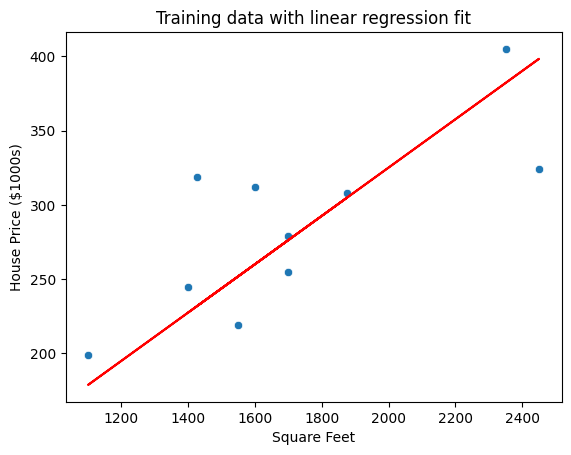

In [10]:
ax = sns.scatterplot(x='Square_Feet', y='House_Price', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Square Feet', ylabel='House Price ($1000s)', title='Training data with linear regression fit');

In [11]:
y_pred = np.array([1, 2000]).dot(theta)
f'For Square Feet = 2000, we predict a House Price of {y_pred[0]*1000}'

'For Square Feet = 2000, we predict a House Price of 325175.3990636603'

In [12]:
y_pred = np.array([1, 1800]).dot(theta)
f'For Square Feet = 1800, we predict a House Price of {y_pred[0]*1000}'

'For Square Feet = 1800, we predict a House Price of 292657.8689042548'

## 3. Visualizing $J(\theta)$ <a id='C3'></a>
The cost function $J(\theta)$ is bowl-shaped and has a global mininum. This minimum is the optimal point for 
$\theta_{0}$ and $\theta_{1}$, and each step of gradient descent moves closer to this point.

In [13]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [14]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [15]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_function(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

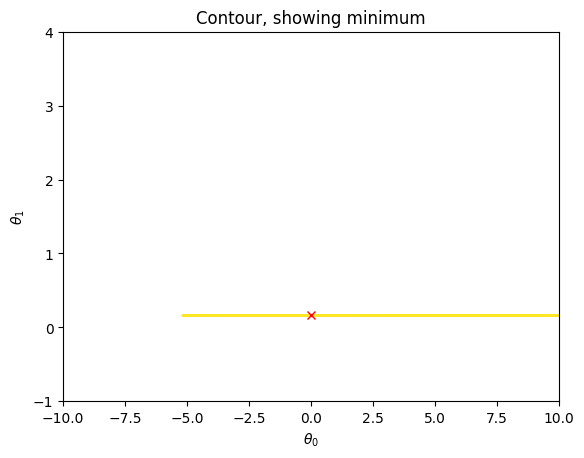

In [16]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');